# 라이브러리 불러오기

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# 데이터 준비

In [157]:
data = pd.read_csv('netflix_titles.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [110]:
data['date_added'].isna().sum()

10

In [56]:
data['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

## date_added 시각화

In [7]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()


,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


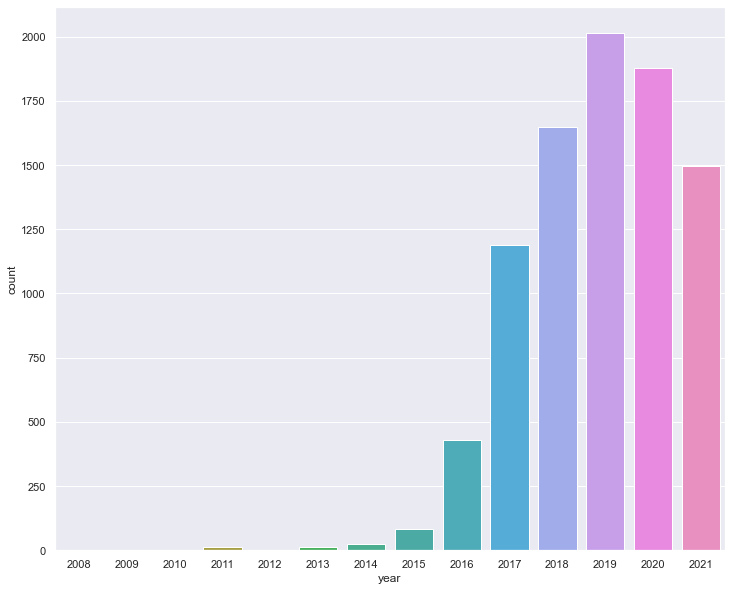

In [86]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
year_order = map(str, range(2008,2022))
ax = sns.countplot(x='year', data=netflix_date, order=year_order)

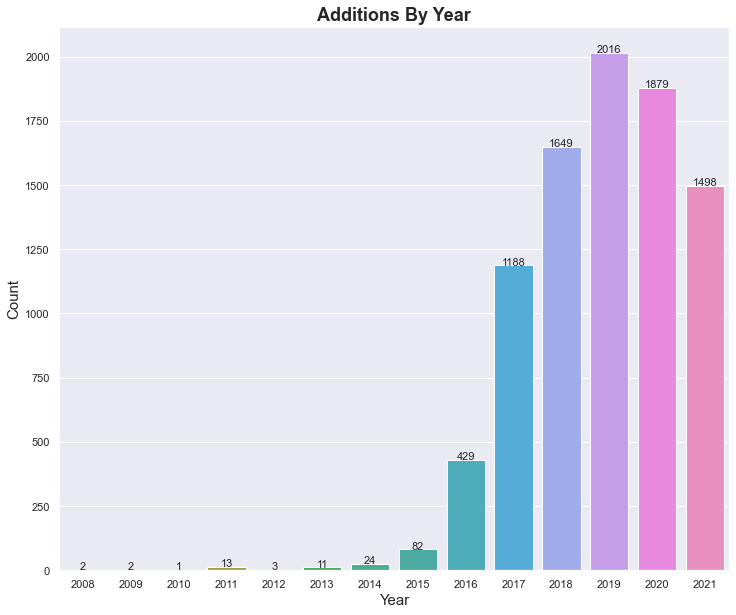

In [87]:
ax.set_title('Additions By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt

In [71]:
netflix_date['month'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

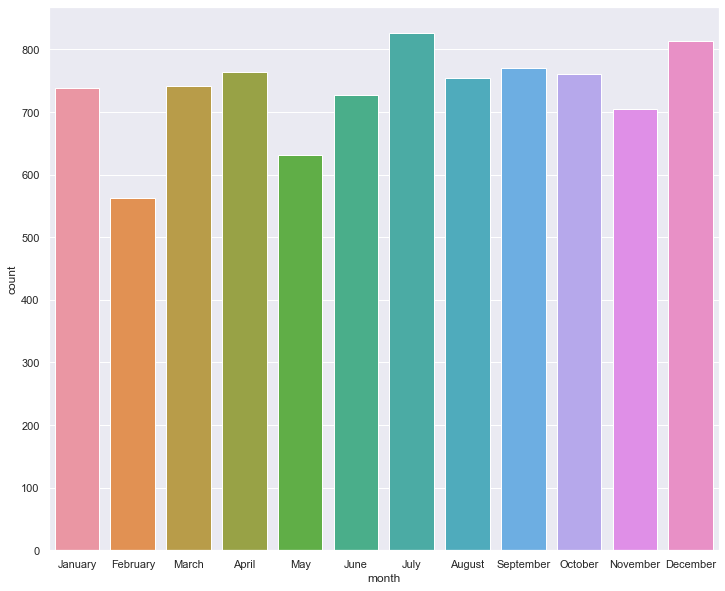

In [84]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='month', data=netflix_date, order=month_order)

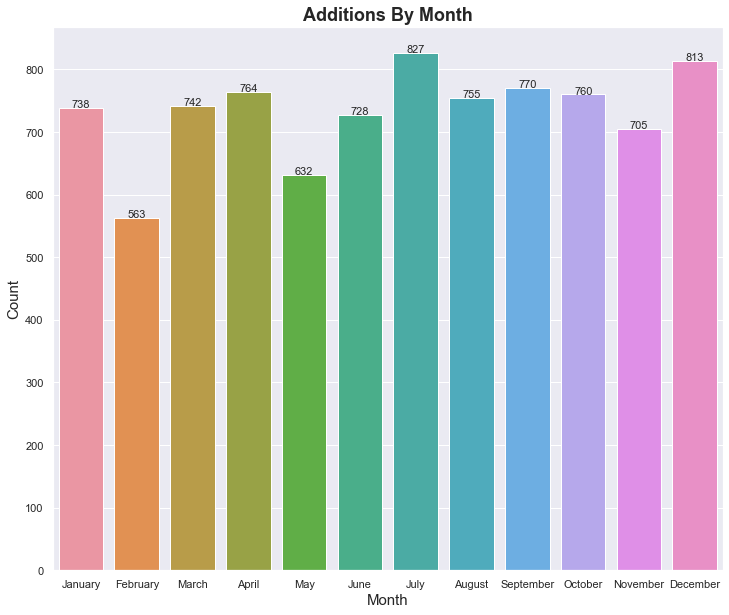

In [85]:
ax.set_title('Additions By Month',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt

# release_year 시각화

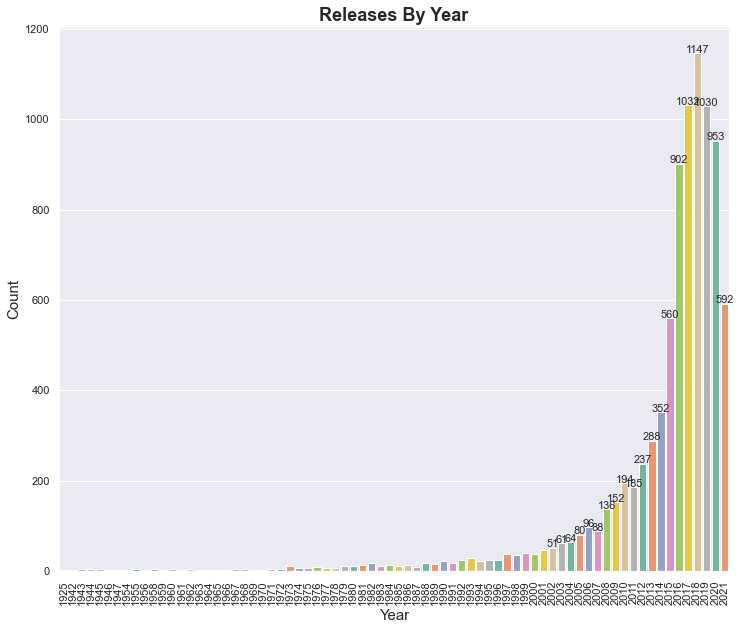

In [100]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='release_year', data=data, palette='Set2')
plt.xticks(rotation='vertical')
ax.set_title('Releases By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches[-20:]:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


### country 복수 개 확인

In [137]:
countries=data[['country']].dropna()
countries['country']=countries['country'].apply(lambda x: x.split(", "))
countries['num'] = countries['country'].apply(lambda x: len(x))
countries

,country,num
0,[United States],1
1,[South Africa],1
4,[India],1
7,"[United States, Ghana, Burkina Faso, United Ki...",6
8,[United Kingdom],1
...,...,...
8801,"[United Arab Emirates, Jordan]",2
8802,[United States],1
8804,[United States],1
8805,[United States],1


In [212]:
countries['num'].value_counts()

1     6660
2      869
3      273
4      115
5       36
6       14
7        5
8        2
12       1
10       1
Name: num, dtype: int64

# Genre One-Hot Encoding

In [153]:
# 장르 고유값 리스트로
original_genres = [x.split(', ') for x in data['listed_in']]
genres = np.unique(sum(original_genres, []))
genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

In [154]:
# 장르 개수
len(genres)

42

In [158]:
# listed_in 장르로 one-hot encoding
data['listed_in'] = [x.split(', ') for x in data['listed_in']]
genre_data = MultiLabelBinarizer(classes=genres).fit_transform(data['listed_in'].values)
df = pd.DataFrame(columns=genres, data=genre_data, index=data.index)
df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [160]:
# data에 one-hot encoding 추가
data = pd.concat([data, df], axis=1)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,0


In [168]:
# 영화 데이터와 드라마 데이터를 movie와 tv에 할당
movie = data[data['type']=='Movie']
tv = data[data['type']=='TV Show']
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0,0,0,0,0,0,0,0,0,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0,0,0,0,0,0,0,0,0,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,0,0,0,0,0,0,0,0,0,0


In [169]:
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,1,1,1,0,0,0,0,0


In [205]:
# 영화에 사용되는 장르 분포
movie_labels = movie.iloc[:,12:].sum()
movie_labels = movie_labels[movie_labels>0]
print(len(movie_labels))
movie_labels

20


Action & Adventure           859
Anime Features                71
Children & Family Movies     641
Classic Movies               116
Comedies                    1674
Cult Movies                   71
Documentaries                869
Dramas                      2427
Faith & Spirituality          65
Horror Movies                357
Independent Movies           756
International Movies        2752
LGBTQ Movies                 102
Movies                        57
Music & Musicals             375
Romantic Movies              616
Sci-Fi & Fantasy             243
Sports Movies                219
Stand-Up Comedy              343
Thrillers                    577
dtype: int64

In [207]:
# 드라마에 사용되는 장르 분포
tv_labels = tv.iloc[:,12:].sum()
tv_labels = tv_labels[tv_labels>0]
print(len(tv_labels))
tv_labels

22


Anime Series                     176
British TV Shows                 253
Classic & Cult TV                 28
Crime TV Shows                   470
Docuseries                       395
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
Reality TV                       255
Romantic TV Shows                370
Science & Nature TV               92
Spanish-Language TV Shows        174
Stand-Up Comedy & Talk Shows      56
TV Action & Adventure            168
TV Comedies                      581
TV Dramas                        763
TV Horror                         75
TV Mysteries                      98
TV Sci-Fi & Fantasy               84
TV Shows                          16
TV Thrillers                      57
Teen TV Shows                     69
dtype: int64

In [226]:
movie_genres=list(movie_labels.index)
movie_genres

['Action & Adventure',
 'Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers']

In [220]:
tv_genres=list(tv_labels.index)
tv_genres

['Anime Series',
 'British TV Shows',
 'Classic & Cult TV',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'Reality TV',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows']

In [227]:
# 영화 데이터 one-hot encoding
movie = data[data['type']=='Movie']
movie_genre_data = MultiLabelBinarizer(classes=movie_genres).fit_transform(movie['listed_in'].values)
df = pd.DataFrame(columns=movie_genres, data=movie_genre_data, index=movie.index)
df.head()

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [228]:
# 영화 데이터에 one-hot encoding 추가
movie = pd.concat([movie, df], axis=1)
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0,0,0,0,0,0,0,0,0,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,1,1,0,0,0,0,0,0,0,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,0,1,0,0,0,0,0,0,0,0


In [230]:
# 드라마 데이터 one-hot encoding
tv = data[data['type']=='TV Show']
tv_genre_data = MultiLabelBinarizer(classes=tv_genres).fit_transform(tv['listed_in'].values)
df = pd.DataFrame(columns=tv_genres, data=tv_genre_data, index=tv.index)
df.head()

,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [231]:
# 영화 데이터에 one-hot encoding 추가
tv = pd.concat([tv, df], axis=1)
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,1,0,1,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,1,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,0,0,0,0,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,1,1,1,0,0,0,0
